# Этап 1. Получение данных

Изучим данные, предоставленные сервисом для проекта.

## Импорт библиотек

In [1]:
import pandas as pd

Прочитаем файл *music_project.csv* и сохраним его в переменной *df*. 

In [2]:
df = pd.read_csv('/datasets/music_project.csv')

Получение первых 10 строк таблицы.

In [3]:
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


Общая информация о данных таблицы *df*.




In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
  userID    65079 non-null object
Track       63848 non-null object
artist      57876 non-null object
genre       63881 non-null object
  City      65079 non-null object
time        65079 non-null object
Day         65079 non-null object
dtypes: object(7)
memory usage: 3.5+ MB


Рассмотрим полученную информацию подробнее.

Всего в таблице 7 столбцов, тип данных у каждого столбца - object.

Подробно разберём, какие в *df* столбцы и какую информацию они содержат:

* userID — идентификатор пользователя;
* Track — название трека;  
* artist — имя исполнителя;
* genre — название жанра;
* City — город, в котором происходило прослушивание;
* time — время, в которое пользователь слушал трек;
* Day — день недели.

Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения.



**Выводы**

Каждая строка таблицы содержит информацию о композициях определённого жанра в определённом исполнении, которые пользователи слушали в одном из городов в определённое время и день недели. Две проблемы, которые нужно решать: пропуски и некачественные названия столбцов. Для проверки рабочих гипотез особенно ценны столбцы *time*, *day* и *City*. Данные из столбца *genre* позволят узнать самые популярные жанры.

# Этап 2. Предобработка данных

Исключим пропуски, переименуем столбцы, а также проверим данные на наличие дубликатов.

Получаем перечень названий столбцов. Какая наблюдается проблема — кроме тех, что уже были названы ранее?

In [5]:
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

В названиях столбцов есть пробелы, которые могут затруднять доступ к данным.

Переименуем столбцы для удобства дальнейшей работы. Проверим результат.



In [6]:
df.set_axis(labels=['user_id', 'track_name', 'artist_name', 'genre_name',\
           'city', 'time', 'weekday'], axis='columns', inplace=True)

In [7]:
df.columns

Index(['user_id', 'track_name', 'artist_name', 'genre_name', 'city', 'time',
       'weekday'],
      dtype='object')

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [8]:
df.isnull().sum()

user_id           0
track_name     1231
artist_name    7203
genre_name     1198
city              0
time              0
weekday           0
dtype: int64

Пустые значения свидетельствуют, что для некоторых треков доступна не вся информация. Причины могут быть разные: скажем,  не назван конкретный исполнитель народной песни. Хуже, если проблемы с записью данных. Каждый отдельный случай необходимо разобрать и выявить причину.

Заменяем пропущенные значения в столбцах с названием трека и исполнителя на строку 'unknown'. После этой операции нужно убедиться, что таблица больше не содержит пропусков.

In [9]:
df['track_name'].fillna('unknown', inplace=True)

In [10]:
df['artist_name'].fillna('unknown', inplace=True)

In [11]:
df.isnull().sum()

user_id           0
track_name        0
artist_name       0
genre_name     1198
city              0
time              0
weekday           0
dtype: int64

Удаляем в столбце с жанрами пустые значения; убеждаемся, что их больше не осталось.

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

user_id        0
track_name     0
artist_name    0
genre_name     0
city           0
time           0
weekday        0
dtype: int64

Необходимо установить наличие дубликатов.  Если найдутся, удаляем, и проверяем, все ли удалились.

In [14]:
df.duplicated().sum()

3755

In [15]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

In [16]:
df.duplicated().sum()

0

Дубликаты могли появиться вследствие сбоя в записи данных. Стоит обратить внимание и разобраться с причинами появления такого «информационного мусора».

Сохраняем список уникальных значений столбца с жанрами в переменной *genres_list*. 

Объявим функцию *find_genre()* для поиска неявных дубликатов в столбце с жанрами. Например, когда название одного и того же жанра написано разными словами.





In [17]:
genres_list = df['genre_name'].unique()

In [18]:
genres_list_sorted = genres_list
genres_list_sorted.sort()
genres_list_sorted

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

In [19]:
def find_genre(genreName):
    count = 0
    for genre in genres_list:
        if genre == genreName:
            count += 1
    return count

Вызов функции *find_genre()* для поиска различных вариантов названия жанра хип-хоп в таблице.

Правильное название — *hiphop*. Поищем другие варианты:

* hip
* hop
* hip-hop


In [20]:
find_genre('hip')

1

In [21]:
find_genre('hop')

0

In [22]:
find_genre('hip-hop')

0

Объявим функцию *find_and_replace_genre()*, которая заменяет  неправильное название этого жанра в столбце *'genre_name'* на *правильное* и проверяет успешность выполнения замены.

Так исправляем все варианты написания, которые выявила проверка.

In [23]:
df['genre_name'].nunique()

287

In [24]:
def find_and_replace_genre(df, wrong_genre_name, correct__genre_name):
    df['genre_name'].replace(wrong_genre_name, correct__genre_name, inplace=True)
    return(df[df['genre_name'] == wrong_genre_name]['genre_name'].count())

In [25]:
find_and_replace_genre(df, 'hip', 'hiphop')
find_and_replace_genre(df, 'электроника', 'electronic')
find_and_replace_genre(df, 'türk', 'türkçe')
find_and_replace_genre(df, 'trip', 'triphop')
find_and_replace_genre(df, 'sound', 'soundtrack')
find_and_replace_genre(df, 'soulful', 'soul')
find_and_replace_genre(df, 'poprussian', 'ruspop')
find_and_replace_genre(df, 'popelectronic', 'electropop')
find_and_replace_genre(df, 'popdance', 'dancepop')
find_and_replace_genre(df, 'neue', 'new')
find_and_replace_genre(df, 'latin', 'latino')
find_and_replace_genre(df, 'frankreich', 'french')
find_and_replace_genre(df, 'französisch', 'french')
find_and_replace_genre(df, 'africa', 'afrikaans')
find_and_replace_genre(df, 'neue', 'new')
df['genre_name'].nunique()

273

Получаем общую информацию о данных. Убеждаемся, что чистка выполнена успешно.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60126 entries, 0 to 60125
Data columns (total 7 columns):
user_id        60126 non-null object
track_name     60126 non-null object
artist_name    60126 non-null object
genre_name     60126 non-null object
city           60126 non-null object
time           60126 non-null object
weekday        60126 non-null object
dtypes: object(7)
memory usage: 3.2+ MB


**Вывод**

На этапе предобработки в данных обнаружились не только пропуски и проблемы с названиями столбцов, но и всяческие виды дубликатов. Их удаление позволит провести анализ точнее. Поскольку сведения о жанрах важно сохранить для анализа, не просто удаляем все пропущенные значения, но заполним пропущенные имена исполнителей и названия треков. Имена столбцов теперь корректны и удобны для дальнейшей работы.

# Действительно ли музыку в разных городах слушают по-разному?

Была выдвинута гипотеза, что в Москве и Санкт-Петербурге пользователи слушают музыку по-разному. Проверяем это предположение по данным о трёх днях недели — понедельнике, среде и пятнице.

Для каждого города устанавливаем количество прослушанных  в эти дни композиций с известным жанром, и сравниваем результаты.

Группируем данные по городу и вызовом метода *count()* подсчитываем композиции, для которых известен жанр.

In [27]:
df.groupby('city')['genre_name'].count()

city
Moscow              41892
Saint-Petersburg    18234
Name: genre_name, dtype: int64

В Москве прослушиваний больше, чем в Питере, но это не значит, что Москва более активна. У Яндекс.Музыки в целом больше пользователей в Москве, поэтому величины сопоставимы.

Сгруппируем данные по дню недели и подсчитаем прослушанные в понедельник, среду и пятницу композиции, для которых известен жанр.

In [28]:
df.groupby(['city', 'weekday'])['genre_name'].count()

city              weekday  
Moscow            Friday       15680
                  Monday       15347
                  Wednesday    10865
Saint-Petersburg  Friday        5802
                  Monday        5519
                  Wednesday     6913
Name: genre_name, dtype: int64

Понедельник и пятница — время для музыки; по средам пользователи немного больше вовлечены в работу.

Создаём функцию *number_tracks()*, которая принимает как параметры таблицу, день недели и название города, а возвращает количество прослушанных композиций, для которых известен жанр. Проверяем количество прослушанных композиций для каждого города и понедельника, затем среды и пятницы.

In [29]:
def number_tracks(df, day, city):
    track_list = df[(df['city'] == city) & (df['weekday'] == day)]
    track_list_count = track_list['genre_name'].count()
    return (track_list_count)

In [30]:
# <список композиций для Москвы в понедельник>

In [31]:
# <список композиций для Санкт-Петербурга в понедельник>

In [32]:
# <список композиций для Москвы в среду>

In [33]:
# <список композиций для Санкт-Петербурга в среду>

In [34]:
# <список композиций для Москвы в пятницу>

In [35]:
# <список композиций для Санкт-Петербурга в пятницу>

Сведём полученную информацию в одну таблицу, где ['city', 'monday', 'wednesday', 'friday'] названия столбцов.


In [36]:
colunms_names = ['city', 'monday', 'wednesday', 'friday']
data = [['Moscow', 15347, 10865, 15680],
       ['Saint-Petersburg', 5519, 6913, 5802]]
df_cites = pd.DataFrame(data=data, columns=colunms_names)
df_cites

,city,monday,wednesday,friday
0,Moscow,15347,10865,15680
1,Saint-Petersburg,5519,6913,5802


**Вывод**

Результаты показывают, что относительно среды музыку в Петербурге и Москве слушают «зеркально»: в Москве пики приходятся на понедельник и пятницу, а в среду время прослушивания снижается. Тогда как в Санкт-Петербурге среда — день самого большого интереса к музыке, а в понедельник и пятницу он меньше, причём почти одинаково меньше.

# Утро понедельника и вечер пятницы — разная музыка или одна и та же?

Ищем ответ на вопрос, какие жанры преобладают в разных городах в понедельник утром и в пятницу вечером. Есть предположение, что в понедельник утром пользователи слушают больше бодрящей музыки (например, жанра поп), а вечером пятницы — больше танцевальных (например, электронику).

Получим таблицы данных по Москве *moscow_general* и по Санкт-Петербургу *spb_general*.

In [37]:
moscow_general = df[df['city'] == 'Moscow']

In [38]:
spb_general = df[df['city'] == 'Saint-Petersburg']

Создаём функцию *genre_weekday()*, которая возвращает список жанров по запрошенному дню недели и времени суток с такого-то часа по такой-то.

In [39]:
def genre_weekday(df, day, time1, time2):
    genre_list = df[(df['weekday'] ==  day) &
                   (df['time'] > time1) & (df['time'] <  time2)]
    genre_list_sorted = genre_list.groupby('genre_name')['genre_name']\
                    .count().sort_values(ascending=False).head(10)
    return(genre_list_sorted)

Cравниваем полученные результаты по таблице для Москвы и Санкт-Петербурга в понедельник утром (с 7 до 11) и в пятницу вечером (с 17 до 23).

In [40]:
mon_msc = genre_weekday(moscow_general, 'Monday', '07:00:00', '11:00:00')

In [41]:
mon_spb = genre_weekday(spb_general, 'Monday', '07:00:00', '11:00:00')

In [42]:
fri_msc = genre_weekday(moscow_general, 'Friday', '17:00:00', '23:00:00')

In [43]:
fri_spb = genre_weekday(spb_general, 'Friday', '17:00:00', '23:00:00')

In [44]:
def normalize(df):
    return (df / df.max())

In [45]:
fri_spb = normalize(fri_spb)
fri_msc = normalize(fri_msc)
mon_spb = normalize(mon_spb)
mon_msc = normalize(mon_msc)

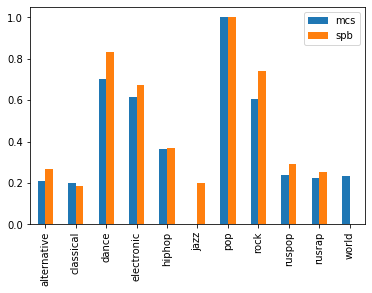

In [54]:
pd.DataFrame({'mcs': mon_msc, 'spb': mon_spb}).plot.bar()

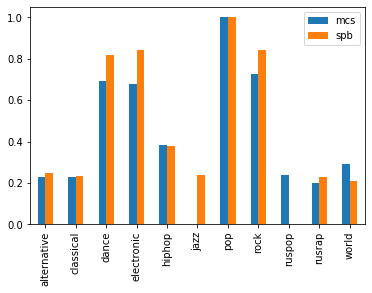

In [47]:
pd.DataFrame({ 'mcs': fri_msc, 'spb': fri_spb}).plot.bar()

Популярные жанры в понедельник утром в Питере и Москве оказались похожи: везде, как и предполагалось, популярен поп. Несмотря на это, концовка топ-10 для двух городов различается: в Питере в топ-10 входит джаз и русский рэп, а в Москве жанр *world*.

В конце недели ситуация не меняется. Поп-музыка всё так же на первом месте. Опять разница заметна только в концовке топ-10, где в Питере пятничным вечером тоже присутствует жанр *world*.

**Вывод**

Жанр поп безусловный лидер, а топ-5 в целом не различается в обеих столицах. При этом видно, что концовка списка более «живая»: для каждого города выделяются более характерные жанры, которые действительно меняют свои позиции в зависимости от дня недели и времени.

# Москва и Питер — две разные столицы, два разных направления в музыке. Правда?

Гипотеза: Питер богат своей рэп-культурой, поэтому это направление там слушают чаще, а Москва — город контрастов, но основная масса пользователей слушает попсу.



Сгруппируем таблицу *moscow_general* по жанру, сосчитаем численность композиций каждого жанра методом *count()*, отсортируем в порядке убывания и сохраним результат в таблице *moscow_genres*.

Просмотрим первые 10 строк этой новой таблицы.

In [48]:
moscow_genres = moscow_general.groupby('genre_name')['genre_name']\
    .count().sort_values(ascending=False)

In [49]:
top_msc = moscow_genres.head(10)
top_msc

genre_name
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre_name, dtype: int64

Сгруппируем таблицу *spb_general* по жанру, сосчитаем численность композиций каждого жанра методом *count()*, отсортируем в порядке убывания и сохраним результат в таблице *spb_genres*.

Просматриваем первые 10 строк этой таблицы. Теперь можно сравнивать два города.

In [50]:
spb_genres = spb_general.groupby('genre_name')['genre_name']\
    .count().sort_values(ascending=False)

In [51]:
top_spb = spb_genres.head(10)
top_spb

genre_name
pop            2431
dance          1932
rock           1879
electronic     1737
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          539
world           515
Name: genre_name, dtype: int64

In [52]:
top_spb = normalize(top_spb)
top_msc = normalize(top_msc)

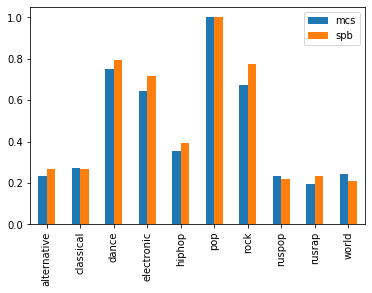

In [53]:
pd.DataFrame({'mcs': top_msc, 'spb': top_spb}).plot.bar()

**Вывод**

В Москве, кроме абсолютно популярного жанра поп, есть направление русской популярной музыки. Значит, что интерес к этому жанру шире. А рэп, вопреки предположению, занимает в обоих городах близкие позиции.

# Этап 4. Результаты исследования


Рабочие гипотезы:

* музыку в двух городах — Москве и Санкт-Петербурге — слушают в разном режиме;

* списки десяти самых популярных жанров утром в понедельник и вечером в пятницу имеют характерные отличия;

* население двух городов предпочитает разные музыкальные жанры.

**Общие результаты**

Москва и Петербург сходятся во вкусах: везде преобладает популярная музыка. При этом зависимости предпочтений от дня недели в каждом отдельном городе нет — люди постоянно слушают то, что им нравится. Но между городами в разрезе дней неделей наблюдается зеркальность относительно среды: Москва больше слушает в понедельник и пятницу, а Петербург наоборот - больше в среду, но меньше в понедельник и пятницу.

В результате первая гипотеза < укажите подтверждена/не подтверждена>, вторая гипотеза < укажите подтверждена/не подтверждена > и третья < укажите подтверждена/не подтверждена >.